**Challenges in Representation Learning: Facial Expression Recognition Challenge** from *https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data*

# Data Exploration

Some data exploration, looking at the structure of the files etc.

In [2]:
# loading packages
import numpy as np 
import pandas as pd 
import os
import torch as th

import warnings
warnings.simplefilter('ignore')

indir = '/home/eileen/udacity/challenge2/FacialExpressions/fer2013'

#listing data files
for dirname, _, filenames in os.walk(indir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/eileen/udacity/challenge2/FacialExpressions/fer2013/fer2013.bib
/home/eileen/udacity/challenge2/FacialExpressions/fer2013/README
/home/eileen/udacity/challenge2/FacialExpressions/fer2013/fer2013.csv


In [3]:
#looking at readme file
with open(indir+'/README','r') as readme:
    contents = readme.read()
    print(contents)

If you use this dataset in your research work, please cite

"Challenges in Representation Learning: A report on three machine learning
contests." I Goodfellow, D Erhan, PL Carrier, A Courville, M Mirza, B
Hamner, W Cukierski, Y Tang, DH Lee, Y Zhou, C Ramaiah, F Feng, R Li,
X Wang, D Athanasakis, J Shawe-Taylor, M Milakov, J Park, R Ionescu,
M Popescu, C Grozea, J Bergstra, J Xie, L Romaszko, B Xu, Z Chuang, and
Y. Bengio. arXiv 2013.

See fer2013.bib for a bibtex entry.



In [4]:
#looking at data file
with open(indir+'/fer2013.csv','r') as f:
    firstline = f.readline() 
    print(firstline)   # print header
    contents = f.readline()
    print(contents)    # print first row with data

emotion,pixels,Usage

0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 2

# Data Preparation

In [5]:
#opening as panda dataframe and looking at "usage" column
df = pd.read_csv(indir+'/fer2013.csv')
df.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [6]:
df.shape

(35887, 3)

In [7]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


## creating 3 dataframes for training data, public testing data and private testing data

In [9]:
train = df.query('Usage == "Training"')
train.drop(columns=['Usage'], inplace=True)
train.reset_index(drop=True, inplace=True)
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [10]:
public_test = df.query('Usage == "PublicTest"')
public_test.drop(columns=['Usage'], inplace=True)
public_test.reset_index(drop=True, inplace=True)
public_test.head()

,emotion,pixels
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,1,156 184 198 202 204 207 210 212 213 214 215 21...
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [11]:
private_test = df.query('Usage == "PrivateTest"')
private_test.drop(columns=['Usage'], inplace=True)
private_test.reset_index(drop=True, inplace=True)
private_test.head()

,emotion,pixels
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...
4,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


In [12]:
train.shape

(28709, 2)

In [13]:
public_test.shape

(3589, 2)

In [14]:
private_test.shape

(3589, 2)

## converting to PyTorch tensors

In [15]:
def mk_labeltensor(dframe):
    """ creating a torch tensor from the emotion column
    dframe = dataframe
    """
    emotions = dframe['emotion'].values
    return th.tensor(emotions)   

In [16]:
def mk_imagetensor(dframe):
    """ creating a torch tensor from the pixels column
    dframe = dataframe
    """
    pixels = dframe['pixels'].str.split(' ')
    dframe_images_list = pixels.apply(lambda x: list(int(i) for i in x))
    return th.tensor(dframe_images_list)

In [17]:
train_labels = mk_labeltensor(train)
train_images = mk_imagetensor(train)
print(train_labels.shape)
print(train_images.shape)

torch.Size([28709])
torch.Size([28709, 2304])


In [18]:
public_test_labels = mk_labeltensor(public_test)
public_test_images = mk_imagetensor(public_test)
print(public_test_labels.shape)
print(public_test_images.shape)

torch.Size([3589])
torch.Size([3589, 2304])


In [19]:
private_test_labels = mk_labeltensor(private_test)
private_test_images = mk_imagetensor(private_test)
print(private_test_labels.shape)
print(private_test_images.shape)

torch.Size([3589])
torch.Size([3589, 2304])


# Linear Model
At first we will try out a linear model to recognize facial expressions. 

## Defining the Model

In [20]:
from torch import nn, optim
import torch.nn.functional as F

In [21]:
df.emotion.nunique()

7

In [23]:
# for reproducible results:
seed = 30
np.random.seed(seed)
th.manual_seed(seed)

In [24]:
# input: 48x48 pixels = 2304
# output: 7 different emotions
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2304, 1024) 
        self.fc2 = nn.Linear(1024, 256) 
        self.fc3 = nn.Linear(256, 64) 
        self.fc4 = nn.Linear(64, 7) 
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # making sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

## Training the Model

In [25]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 15
batch_size = 100
batches = round(train.shape[0]/batch_size)

acc, train_losses, test_losses = [], [], []
for e in range(epochs):
    running_loss = 0
    for i in range(batches):
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        start = i * batch_size
        end = start + batch_size
        log_ps = model(train_images[start:end].float())

        # Calculate loss
        loss = criterion(log_ps, train_labels[start:end])
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()        
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Validation
        with th.no_grad(): 
            model.eval()
            # Predict test dataset
            log_ps = model(public_test_images.float())
            test_loss += criterion(log_ps,public_test_labels)
            
            ps = th.exp(log_ps)
            top_p, top_class = ps.topk(1,dim=1)
            equals = top_class == public_test_labels.view(*top_class.shape)
            accuracy += th.mean(equals.type(th.FloatTensor))
            
        model.train()
        
        train_losses.append(running_loss/batch_size)
        test_losses.append(test_loss)
        acc.append(accuracy)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/batch_size),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(accuracy))

Epoch: 1/15..  Training Loss: 7.599..  Test Loss: 1.902..  Test Accuracy: 0.249
Epoch: 2/15..  Training Loss: 5.410..  Test Loss: 1.866..  Test Accuracy: 0.249
Epoch: 3/15..  Training Loss: 5.329..  Test Loss: 1.846..  Test Accuracy: 0.249
Epoch: 4/15..  Training Loss: 5.280..  Test Loss: 1.834..  Test Accuracy: 0.250
Epoch: 5/15..  Training Loss: 5.261..  Test Loss: 1.827..  Test Accuracy: 0.250
Epoch: 6/15..  Training Loss: 5.239..  Test Loss: 1.822..  Test Accuracy: 0.250
Epoch: 7/15..  Training Loss: 5.223..  Test Loss: 1.818..  Test Accuracy: 0.250
Epoch: 8/15..  Training Loss: 5.212..  Test Loss: 1.816..  Test Accuracy: 0.250
Epoch: 9/15..  Training Loss: 5.206..  Test Loss: 1.814..  Test Accuracy: 0.250
Epoch: 10/15..  Training Loss: 5.202..  Test Loss: 1.813..  Test Accuracy: 0.250
Epoch: 11/15..  Training Loss: 5.199..  Test Loss: 1.812..  Test Accuracy: 0.250
Epoch: 12/15..  Training Loss: 5.199..  Test Loss: 1.812..  Test Accuracy: 0.250
Epoch: 13/15..  Training Loss: 5.196.

## Plotting the Loss and the Accuracy

In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

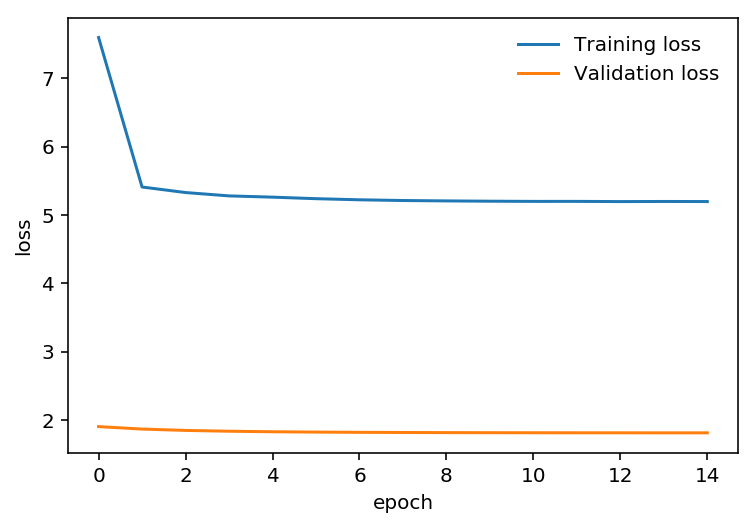

In [27]:
eps = range(epochs)
plt.plot(eps, train_losses, label='Training loss')
plt.plot(eps, test_losses, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.ylim(0,6.0)
plt.legend(frameon=False);

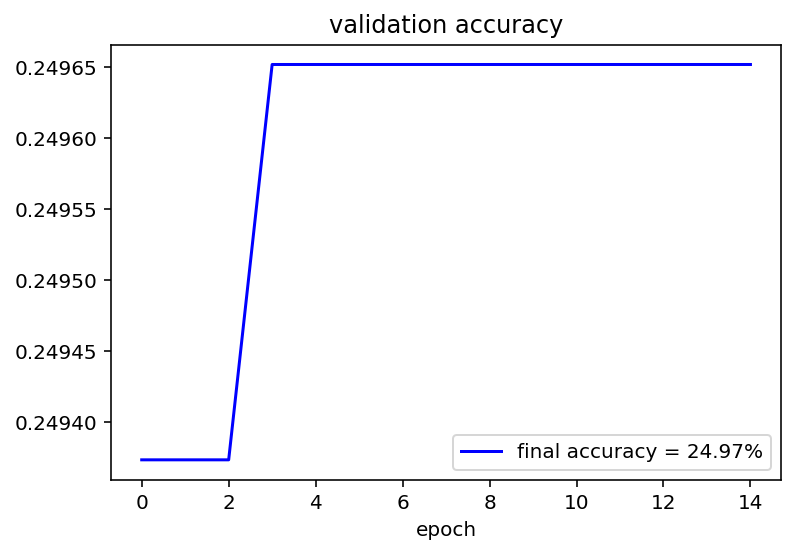

In [28]:
plt.plot(eps, acc, 'b', label='Validation acc')
plt.title('validation accuracy');
plt.legend(['final accuracy = {:.2f}%'.format(accuracy * 100.0)])
plt.xlabel('epoch');

### Result
The accuracy does not go above 25%. That is better than guesswork (7 choices of emotions would give about 14-15% accuracy when guessing), but not really great. A different model structure might lead to better results. 

# Convolutional Neural Network (CNN)
A CNN model is our next try. Here we get very different results with different optimizers and learning rates. We have to try different structures. 

In [29]:
# we need to restructure the data, so that pixels are represented in a 48x48 format:
train_images = train_images.view(train_images.shape[0],48,48)
public_test_images = public_test_images.view(public_test_images.shape[0],48,48)
private_test_images = private_test_images.view(private_test_images.shape[0],48,48)
print(train_images.shape)
print(public_test_images.shape)
print(private_test_images.shape)

torch.Size([28709, 48, 48])
torch.Size([3589, 48, 48])
torch.Size([3589, 48, 48])


In [30]:
# using dataloader for the images and labels
import torch.utils.data

def make_dataloader(data, batch_size, shuffle):
    images, labels = data['pixels'], data['emotion']
    images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in images])
    images = images.reshape(images.shape[0], 1, 48, 48)
    dataset = torch.utils.data.TensorDataset(th.Tensor(images), th.Tensor(np.array(labels)).long())
    return th.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle)

trainloader = make_dataloader(train, 100, True)
testloader = make_dataloader(public_test, 100, True)
validloader = make_dataloader(private_test, 100, False)

## With Adam Optimizer
### Defining the Model

In [31]:
# for reproducible results:
seed = 30
np.random.seed(seed)
torch.manual_seed(seed)

In [32]:
class NetAdam(nn.Module):
    def __init__(self):
        super(NetAdam, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)       
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        
        self.fc1 = nn.Linear(2048, 1024) #784, 256)
        self.fc2 = nn.Linear(1024, 256) #256, 128)
        self.fc3 = nn.Linear(256, 64) #128, 64)
        self.fc4 = nn.Linear(64, 7) #64, 10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x


### Training the Model

In [33]:
model = NetAdam()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 15

acc, train_losses, test_losses = [], [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        log_ps = model(images)

        # Calculate loss
        loss = criterion(log_ps, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()        
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Validation
        with th.no_grad(): 
            for images, labels in testloader:
                model.eval()
                # Predict test dataset
                log_ps = model(images)
                test_loss += criterion(log_ps,labels)

                ps = th.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += th.mean(equals.type(th.FloatTensor))
            
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        acc.append(accuracy/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/15..  Training Loss: 1.793..  Test Loss: 1.608..  Test Accuracy: 0.376
Epoch: 2/15..  Training Loss: 1.549..  Test Loss: 1.451..  Test Accuracy: 0.444
Epoch: 3/15..  Training Loss: 1.420..  Test Loss: 1.393..  Test Accuracy: 0.473
Epoch: 4/15..  Training Loss: 1.311..  Test Loss: 1.320..  Test Accuracy: 0.497
Epoch: 5/15..  Training Loss: 1.226..  Test Loss: 1.269..  Test Accuracy: 0.520
Epoch: 6/15..  Training Loss: 1.133..  Test Loss: 1.314..  Test Accuracy: 0.519
Epoch: 7/15..  Training Loss: 1.051..  Test Loss: 1.264..  Test Accuracy: 0.535
Epoch: 8/15..  Training Loss: 0.947..  Test Loss: 1.294..  Test Accuracy: 0.541
Epoch: 9/15..  Training Loss: 0.838..  Test Loss: 1.350..  Test Accuracy: 0.534
Epoch: 10/15..  Training Loss: 0.729..  Test Loss: 1.445..  Test Accuracy: 0.547
Epoch: 11/15..  Training Loss: 0.623..  Test Loss: 1.547..  Test Accuracy: 0.548
Epoch: 12/15..  Training Loss: 0.549..  Test Loss: 1.682..  Test Accuracy: 0.538
Epoch: 13/15..  Training Loss: 0.469.

### Plotting Loss and Accuracy

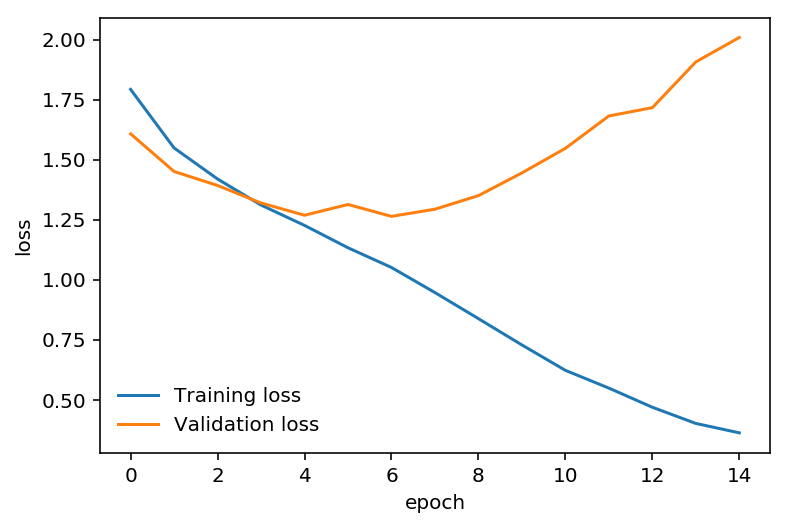

In [34]:
eps = range(epochs)
plt.plot(eps, train_losses, label='Training loss')
plt.plot(eps, test_losses, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(frameon=False);

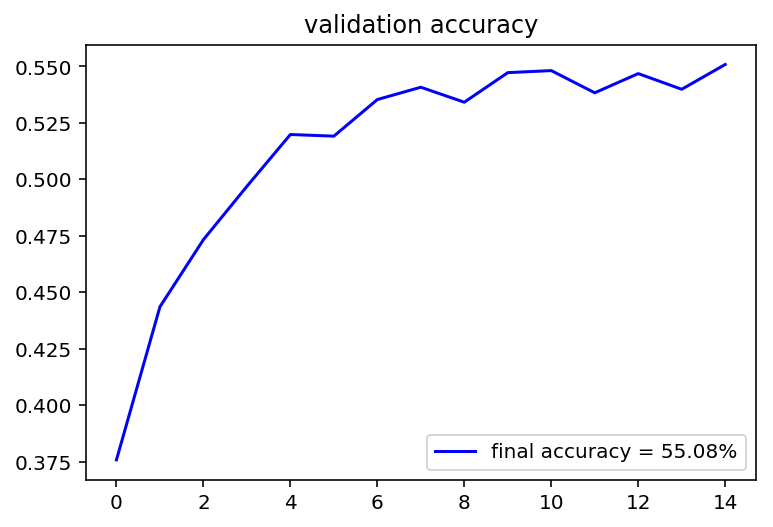

In [39]:
plt.plot(eps, acc, 'b', label='Validation accuracy')
plt.title('validation accuracy');
plt.legend(['final accuracy = {:.2f}%'.format(acc[-1]*100)]);

This gives us an **accuracy of 55.1%** on the test set. This is already quite good, but we want to try if we can get better results with the SGD optimizer. 

## With SGD Optimizer
### Defining the Model

In [40]:
class NetSGD(nn.Module):
    def __init__(self):
        super(NetSGD, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)       
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        
        self.fc1 = nn.Linear(2048, 1024) 
        self.fc2 = nn.Linear(1024, 256) 
        self.fc3 = nn.Linear(256, 64) 
        self.fc4 = nn.Linear(64, 7) 
        
        # Dropout module with 0.3 drop probability
        self.dropout = nn.Dropout(p=0.3)
        
        self.pool = nn.MaxPool2d(2)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x


### Training the Model

In [32]:
modelSGD = NetSGD()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 150

acc, train_losses, test_losses = [], [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        log_ps = modelSGD(images)

        # Calculate loss
        loss = criterion(log_ps, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()        
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Validation
        with th.no_grad(): 
            for images, labels in testloader:
                model.eval()
                # Predict test dataset
                log_ps = modelSGD(images)
                test_loss += criterion(log_ps,labels)

                ps = th.exp(log_ps)
                top_p, top_class = ps.topk(1,dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += th.mean(equals.type(th.FloatTensor))
            
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        acc.append(accuracy/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/150..  Training Loss: 1.876..  Test Loss: 1.821..  Test Accuracy: 0.249
Epoch: 2/150..  Training Loss: 1.837..  Test Loss: 1.804..  Test Accuracy: 0.249
Epoch: 3/150..  Training Loss: 1.824..  Test Loss: 1.793..  Test Accuracy: 0.251
Epoch: 4/150..  Training Loss: 1.812..  Test Loss: 1.785..  Test Accuracy: 0.250
Epoch: 5/150..  Training Loss: 1.801..  Test Loss: 1.760..  Test Accuracy: 0.259
Epoch: 6/150..  Training Loss: 1.785..  Test Loss: 1.746..  Test Accuracy: 0.289
Epoch: 7/150..  Training Loss: 1.767..  Test Loss: 1.720..  Test Accuracy: 0.354
Epoch: 8/150..  Training Loss: 1.745..  Test Loss: 1.710..  Test Accuracy: 0.374
Epoch: 9/150..  Training Loss: 1.722..  Test Loss: 1.664..  Test Accuracy: 0.372
Epoch: 10/150..  Training Loss: 1.706..  Test Loss: 1.684..  Test Accuracy: 0.327
Epoch: 11/150..  Training Loss: 1.690..  Test Loss: 1.658..  Test Accuracy: 0.344
Epoch: 12/150..  Training Loss: 1.675..  Test Loss: 1.628..  Test Accuracy: 0.386
Epoch: 13/150..  Training

### Plotting the Loss and Accuracy

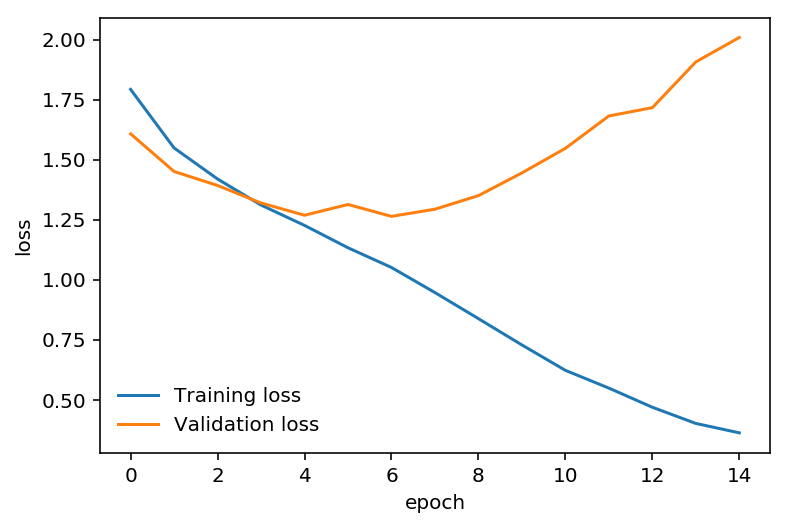

In [48]:
eps = range(epochs)
plt.plot(eps, train_losses, label='Training loss')
plt.plot(eps, test_losses, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(frameon=False);

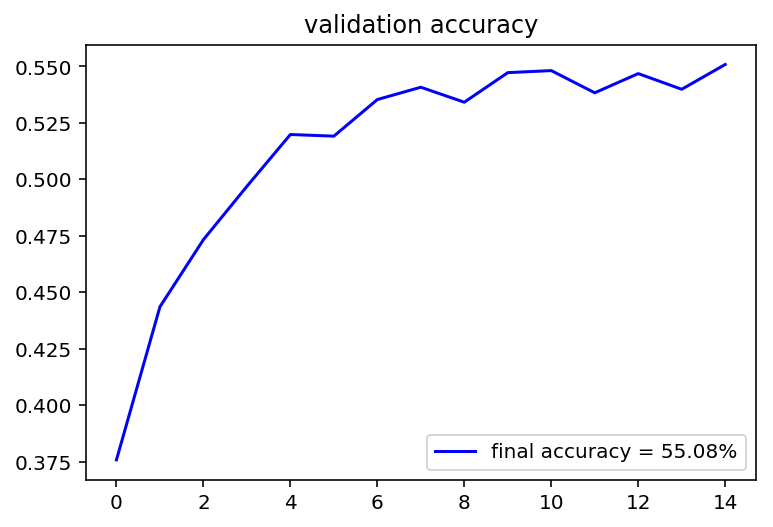

In [49]:
plt.plot(eps, acc, 'b', label='Validation accuracy')
plt.title('validation accuracy');
plt.legend(['final accuracy = {:.2f}%'.format(acc[-1]*100)]);

Even after 150 epochs the **accuracy of 53.4%** is not higher than with Adam-Optimizer model with just 15 epochs, but training takes a lot longer. Therefore this model is not an improvement. We will try another model. 

# Another CNN Model

## Data Preparation

In [52]:
data = pd.read_csv(indir+'/fer2013.csv')
print(data.shape)

(35887, 3)


In [53]:
val_orig, test_orig, train_orig = data.groupby('Usage')
print('val:',   val_orig[0])
print('test:',  test_orig[0])
print('train:', train_orig[0])
print(val_orig[1].head(2))

val: PrivateTest
test: PublicTest
train: Training
       emotion                                             pixels        Usage
32298        0  170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...  PrivateTest
32299        5  7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...  PrivateTest


In [54]:
val_data_orig, test_data_orig, train_data_orig = val_orig[1], test_orig[1], train_orig[1]
print('val_data_orig.shape:  ', val_data_orig.shape)
print('test_data_orig.shape: ',  test_data_orig.shape)
print('train_data_orig.shape:', train_data_orig.shape)

val_data_orig.shape:   (3589, 3)
test_data_orig.shape:  (3589, 3)
train_data_orig.shape: (28709, 3)


In [55]:
def prepare(data):
    images = np.array([np.fromstring(image, np.uint8, sep=' ') for image in data['pixels']])
    images = images.reshape(images.shape[0], 48, 48)
    images = np.stack((images,) * 3, axis=-1)
    labels = np.array(data['emotion'])
    return images, labels.reshape(len(labels), 1)

val_data_orig_X,   val_data_orig_Y   = prepare(val_data_orig)
test_data_orig_X,  test_data_orig_Y  = prepare(test_data_orig)
train_data_orig_X, train_data_orig_Y = prepare(train_data_orig)

print('val_data_orig_X.shape:  ', val_data_orig_X.shape)
print('val_data_orig_Y.shape:  ', val_data_orig_Y.shape)
print('test_data_orig_X.shape: ', test_data_orig_X.shape)
print('test_data_orig_Y.shape: ', test_data_orig_Y.shape)
print('train_data_orig_X.shape:', train_data_orig_X.shape)
print('train_data_orig_Y.shape:', train_data_orig_Y.shape)

val_data_orig_X.shape:   (3589, 48, 48, 3)
val_data_orig_Y.shape:   (3589, 1)
test_data_orig_X.shape:  (3589, 48, 48, 3)
test_data_orig_Y.shape:  (3589, 1)
train_data_orig_X.shape: (28709, 48, 48, 3)
train_data_orig_Y.shape: (28709, 1)


In [56]:
train_data_Y = np.eye(7)[train_data_orig_Y.reshape(-1)]
train_data_Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [57]:
val_data_Y  = np.eye(7)[val_data_orig_Y.reshape(-1)]
test_data_Y = np.eye(7)[test_data_orig_Y.reshape(-1)]

In [58]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

train_data_orig_Y: 3
emotion: Happy


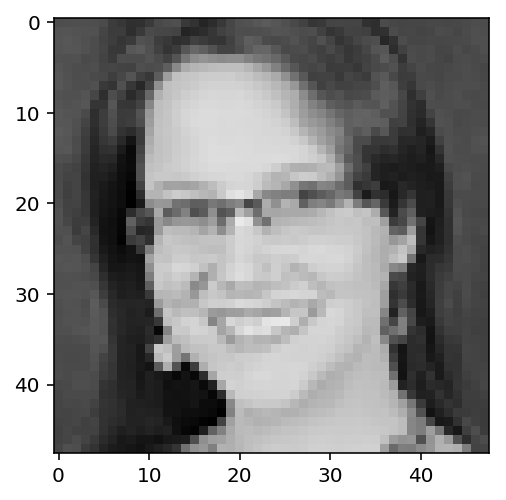

In [59]:
index = 7
plt.imshow(train_data_orig_X[index])
print('train_data_orig_Y:', train_data_orig_Y[index][0])
print('emotion:', emotions[np.where(train_data_Y[index, :] == 1)[0][0]])

## Training the Model

In [61]:
import tensorflow as tf
from tensorflow.python.framework import ops
import math

In [62]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape=[None, n_y])
    
    return X, Y
X, Y = create_placeholders(48, 48, 3, 7)
print('X:', X)
print('Y:', Y)

X: Tensor("Placeholder:0", shape=(?, 48, 48, 3), dtype=float32)
Y: Tensor("Placeholder_1:0", shape=(?, 7), dtype=float32)


In [64]:
def initialize_parameters():
    W1 = tf.get_variable('W1', [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable('W2', [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer())
    
    parameters = {'W1' : W1,
                  'W2' : W2}
    
    return parameters

In [65]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1, 1, 1]))
    print("W2 = " + str(parameters["W2"].eval()[1, 1, 1]))

W0819 13:40:09.734265 139644989413120 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1 = [-0.1320848   0.10930885 -0.00154065  0.15939452 -0.18380184  0.15448336
  0.02520965 -0.0548813 ]
W2 = [ 0.01906937 -0.09174544 -0.10848433 -0.08736813  0.01733667  0.03061759
 -0.029899    0.13276094  0.21292257  0.02214384  0.11686075  0.14175373
 -0.02699548 -0.18018472  0.16310841 -0.17431891]


In [66]:
def forward_propagation(X, parameters):  
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')

    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

    F = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(F,   120, activation_fn=tf.nn.relu)
    Z4 = tf.contrib.layers.fully_connected(Z3,   64, activation_fn=tf.nn.relu)
    Z5 = tf.contrib.layers.fully_connected(Z4,    7,   activation_fn=None)

    return Z5

In [67]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(48, 48, 3, 7)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2, 48, 48, 3), Y: np.random.randn(2, 7)})
    print("Z = " + str(a))

W0819 13:40:18.304095 139644989413120 deprecation.py:323] From /home/eileen/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


Z = [[ 0.17071213 -1.5759544   0.2636412  -0.85942864  0.29739666  0.14196292
  -0.62942433]
 [ 0.24379545 -1.5965977  -0.12846392 -0.6421461   0.56848305 -0.07953613
  -0.45063743]]


In [68]:
def compute_cost(Z, Y):

    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits = Z, labels = Y) )
    
    return cost

In [69]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(48, 48, 3, 7)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4, 48, 48, 3), Y: np.random.randn(4, 7)})
    print("cost = " + str(a))

W0819 13:40:22.518725 139644989413120 deprecation.py:323] From <ipython-input-68-91edf5235ec9>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



cost = -2.501046


In [70]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [71]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0005,
          num_epochs = 30, minibatch_size = 50, print_cost = True):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (m, n_H0, n_W0, n_C0) = X_train.shape          
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    accurancies = []

    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
    
 
    with tf.Session() as sess:
            # Run the initialization
            sess.run(init)

            # Do the training loop
            for epoch in range(num_epochs):

                minibatch_cost = 0.
                num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
                minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

                for minibatch in minibatches:

                    # Select a minibatch
                    (minibatch_X, minibatch_Y) = minibatch

                    _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                    minibatch_cost += temp_cost / num_minibatches


                # Print the cost every epoch
                if print_cost == True and epoch % 5 == 0:
                    print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            
                if print_cost == True and epoch % 1 == 0:
                    costs.append(minibatch_cost)
                    # Calculate the correct predictions
                    predict_op = tf.argmax(Z3, 1)
                    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

                    # Calculate accuracy on the test set
                    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
                    accurancies.append(test_accuracy)


            # plot the cost
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            
            # plot the accurancies
            plt.plot(np.squeeze(accurancies))
            plt.ylabel('accurancy')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
            
            # Calculate the correct predictions
            predict_op = tf.argmax(Z3, 1)
            correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

            # Calculate accuracy on the test set
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print(accuracy)
            train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
            test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
            print("Train Accuracy:", train_accuracy)
            print("Test Accuracy:", test_accuracy)

            return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.747928
Cost after epoch 5: 1.402561
Cost after epoch 10: 1.261864
Cost after epoch 15: 1.125621
Cost after epoch 20: 0.996478
Cost after epoch 25: 0.875181


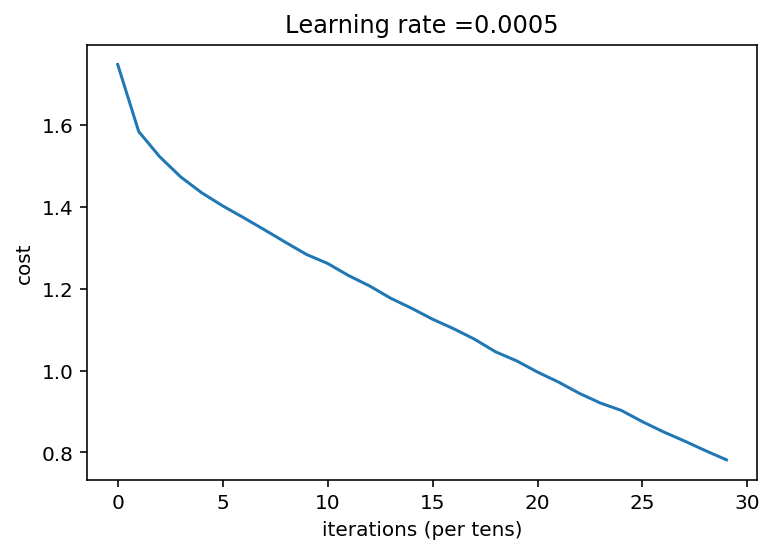

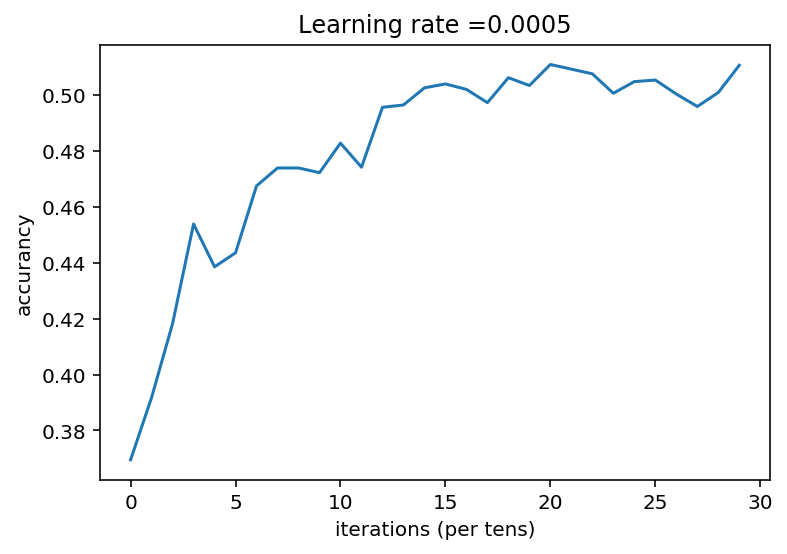

Tensor("Mean_31:0", shape=(), dtype=float32)
Train Accuracy: 0.74561983
Test Accuracy: 0.5107272


In [72]:
_, _, parameters = model(train_data_orig_X/255, train_data_Y, test_data_orig_X/255, test_data_Y)

This model gives us an **accuracy score of 51.1%**, but with much faster training. We will try another model type to see if we can improve our accuracy. 